# Pick colors for hiprfish coloring

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


In [4]:
probe_design_dir = '/workdir/bmg224/manuscripts/mgefish/data/unused/fig_5/HiPRFISH_probe_design_output'
probe_design_fn = probe_design_dir + '/welch2016_5b_distant.csv'
os.path.exists(probe_design_fn)

True

In [5]:
probe_design = pd.read_csv(probe_design_fn)
probe_design.columns

Index(['sci_name', 'code'], dtype='object')

In [6]:
scinames = probe_design.sci_name.values
scinames

array(['Streptococcus', 'Veillonella', 'Rothia', 'Actinomyces',
       'Selenomonas', 'Campylobacter', 'Corynebacterium', 'Leptotrichia',
       'Lautropia', 'Pasteurellaceae', 'Porphyromonas', 'Capnocytophaga',
       'Prevotella', 'Gemella', 'Treponema', 'Fusobacterium',
       'Neisseriaceae', 'TM7'], dtype=object)

In [7]:
scinames_sort = ['Veillonella','Streptococcus','Lautropia','Neisseriaceae','Corynebacterium','Leptotrichia','Prevotella','Porphyromonas','Actinomyces','Rothia','Selenomonas','Campylobacter','Pasteurellaceae','Capnocytophaga','Gemella','Treponema','Fusobacterium','TM7']
len(scinames_sort)

18

In [8]:
colors = plt.get_cmap('tab20').colors
solids = np.arange(0,20,2).tolist()
solids.remove(14)  # remove gray
faded = np.arange(1,20,2).tolist()
faded.remove(15)
colors_sorted = [colors[i] for i in solids+faded]
len(colors_sorted)

18

In [9]:
def general_plot(xlabel='', ylabel='', ft=12, dims=(5,3), col='k', lw=1, pad=0):
    fig, ax = plt.subplots(figsize=(dims[0], dims[1]),  tight_layout={'pad': pad})
    for i in ax.spines:
        ax.spines[i].set_linewidth(lw)
    ax.spines['top'].set_color(col)
    ax.spines['bottom'].set_color(col)
    ax.spines['left'].set_color(col)
    ax.spines['right'].set_color(col)
    ax.tick_params(direction='in', labelsize=ft, color=col, labelcolor=col)
    ax.set_xlabel(xlabel, fontsize=ft, color=col)
    ax.set_ylabel(ylabel, fontsize=ft, color=col)
    ax.patch.set_alpha(0)
    return(fig, ax)

def taxon_legend(taxon_names, taxon_colors, label_color='k', taxon_counts=[],
                 text_shift_vh=(6,0.15), ft=20, dims=(6,10), lw=2, ylabel='Genus'):
    fig, ax = general_plot(ylabel=ylabel, dims=dims, col=label_color, lw=lw, ft=ft)
    vals = np.repeat(10,len(taxon_names))
    y_pos = np.arange(len(taxon_names))
    ax.barh(y_pos, vals, align='center', color=taxon_colors)
    if len(taxon_counts)>0:
        # Label the legend with counts
        for i, (v, c) in enumerate(zip(vals, taxon_counts)):
            ax.text(v - text_shift_vh[0], i + text_shift_vh[1] ,
                    str(c), color='k', fontsize=ft)
    # Remove the boundaries
    for spine in ax.spines.values():
        spine.set_visible(False)
    # Add the genus names to the y axis
    ax.set_yticks(y_pos)
    ax.set_xticks([])
    ax.set_yticklabels(taxon_names)
    ax.invert_yaxis()
    return(fig, ax)

(<Figure size 432x720 with 1 Axes>, <AxesSubplot:ylabel='Genus'>)

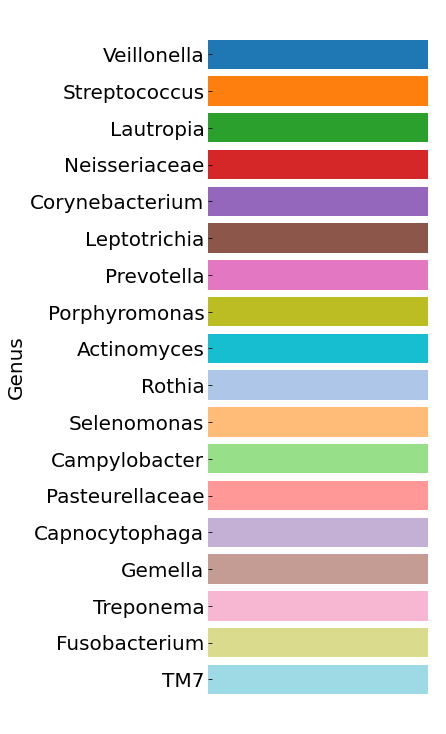

In [10]:
taxon_legend(scinames_sort, colors_sorted)


In [11]:
colors_df = pd.DataFrame({'sci_name':scinames_sort, 'color':colors_sorted})
colors_df

,sci_name,color
0,Veillonella,"(0.12156862745098039, 0.4666666666666667, 0.70..."
1,Streptococcus,"(1.0, 0.4980392156862745, 0.054901960784313725)"
2,Lautropia,"(0.17254901960784313, 0.6274509803921569, 0.17..."
3,Neisseriaceae,"(0.8392156862745098, 0.15294117647058825, 0.15..."
4,Corynebacterium,"(0.5803921568627451, 0.403921568627451, 0.7411..."
5,Leptotrichia,"(0.5490196078431373, 0.33725490196078434, 0.29..."
6,Prevotella,"(0.8901960784313725, 0.4666666666666667, 0.760..."
7,Porphyromonas,"(0.7372549019607844, 0.7411764705882353, 0.133..."
8,Actinomyces,"(0.09019607843137255, 0.7450980392156863, 0.81..."
9,Rothia,"(0.6823529411764706, 0.7803921568627451, 0.909..."


In [12]:
workdir = '/workdir/bmg224/manuscripts/mgefish/code/harvard_plasmids_imaging/2023_09_12_sapp05_spades08'
colors_df_fn = workdir + '/colormap_18.csv'
colors_df.to_csv(colors_df_fn, index=False)